# Task 1: House Price Prediction with Neural Networks

##  What is This Project About?

In this project, we will use a **neural network** to **predict house prices**.

We’ll use a dataset that contains different information about houses — like how big the house is, how many bedrooms it has, how many bathrooms, and more.  
Our goal is to predict how much a house will cost based on these details.

---

##  What Are We Trying to Do?

We will:

- Load and understand the dataset  
- Clean the data (fix missing values, convert text to numbers)  
- Build a **neural network** using TensorFlow and Keras  
- Train the model to learn patterns from the data  
- Check how well our model predicts house prices using error values like:
  - Mean Absolute Error (MAE)  
  - Mean Squared Error (MSE)  
  - Root Mean Squared Error (RMSE)  

---

##  Why Is This Useful?

Knowing how much a house is worth helps:

- Buyers and sellers make smarter decisions  
- Investors know where to put money  
- Governments and real estate agents plan better  

Neural networks are great at finding complex patterns in data. That’s why we’ll use one for this project.



# Step 1: Import Libraries

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Step 2: Load the Dataset

In [15]:
# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Step 3: Understand and Pre-process Sample Data

In [16]:
# Show shape of the dataset
print("Dataset shape:", df.shape)

# Show basic statistics
print("\nSummary statistics:")
print(df.describe())


Dataset shape: (3000, 9)

Summary statistics:
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        

# Step 4: Feature Scaling and Train-Test Split

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Step 0: Separate features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)

print("Data Splitting Done")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Data Splitting Done
X_train shape: (2400, 8)
X_test shape: (600, 8)


# Step 5: Build the XGB Regressor ANN

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Step 4: Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=0
)

# Step 5: Train the model
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# Step 6: Model Evaluation and Predictions

In [22]:
# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nXGBoost Model Evaluation:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))



XGBoost Model Evaluation:
Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.1
Root Mean Squared Error (RMSE): 0.32
R² Score: 0.384


## Task 2: Customer Churn Prediction Using Neural Network (with Class Weighting)

### Objective:
Predict whether a customer will churn (exit the bank) using a neural network. The dataset is imbalanced, with fewer customers who churned.

### Dataset:
- File: Churn_Modelling.csv
- Features include: CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
- Target variable: 'Exited' (1 = churned, 0 = retained)

### Preprocessing:
- Selected relevant features and target.
- Applied label encoding to categorical features.
- Standardized numerical features using StandardScaler.
- Split data into training and test sets.

### Handling Class Imbalance:
- Used class weighting in the neural network to penalize misclassification of the minority class.
- Calculated class weights using `sklearn.utils.class_weight.compute_class_weight`.

### Neural Network Model:
- Built using Keras Sequential API.
- Architecture:
  - Input Layer: Matches number of features
  - Hidden Layer 1: Dense(64), activation='relu'
  - Hidden Layer 2: Dense(32), activation='relu'
  - Output Layer: Dense(1), activation='sigmoid'
- Loss Function: Binary Crossentropy
- Optimizer: Adam
- Metrics: Accuracy
- Trained with class_weight parameter in model.fit()

### Evaluation:
- Evaluated on test set using:
  - Accuracy
  - F1 Score
  - ROC AUC Score
  - Classification Report
  - Confusion Matrix

### Results (Class Weighting):

- Accuracy: 0.762
- F1 Score: 0.5649
- ROC AUC Score: 0.8417


Conclusion: Class weighting improved the model’s ability to detect the minority class (churned customers), providing a balanced performance.


In [23]:
df = pd.read_csv("Churn_Modelling.csv")


In [20]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Load and Preprocess Data
df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Encode categorical columns
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

# One-hot encode Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# Features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class Weights:", class_weight_dict)

# 4. Build the Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the Model
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weight_dict,
    verbose=1
)

# 6. Evaluate the Model
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nAccuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("ROC AUC Score:", round(roc_auc, 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Class Weights: {0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6515 - loss: 0.6457 - val_accuracy: 0.7525 - val_loss: 0.5200
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7411 - loss: 0.5297 - val_accuracy: 0.7588 - val_loss: 0.4935
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7671 - loss: 0.4998 - val_accuracy: 0.7650 - val_loss: 0.4726
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7720 - loss: 0.4789 - val_accuracy: 0.8037 - val_loss: 0.4119
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7865 - loss: 0.4688 - val_accuracy: 0.7450 - val_loss: 0.4839
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7887 - loss: 0.4583 - val_accuracy: 0.7850 - val_loss: 0.4271
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8077 - loss: 0.4364 - val_accuracy: 0.7812 - val_loss: 0.4332
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4497 - val_accuracy: 0.7850 - val_

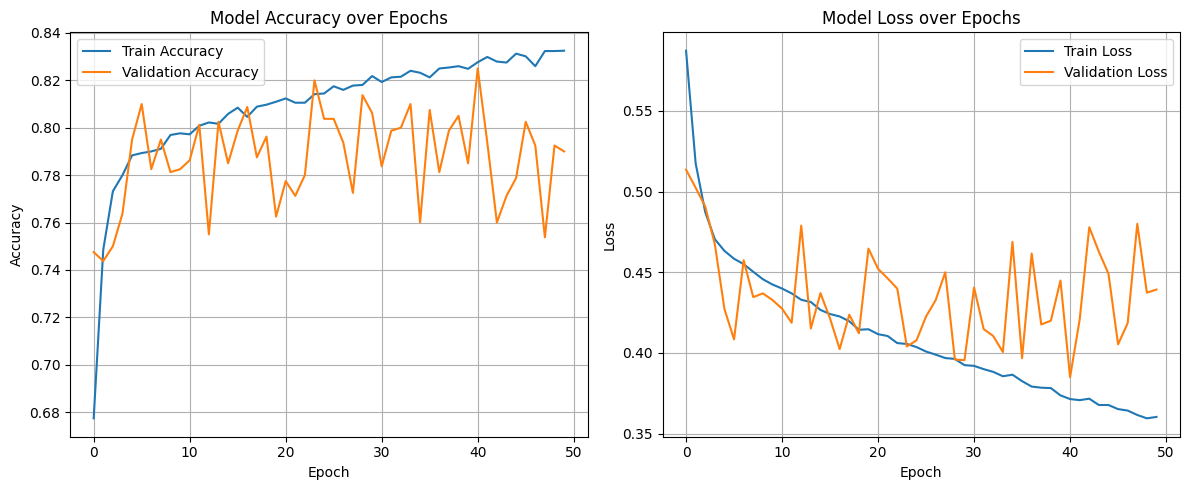

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
